In [19]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import torch

sys.path.append(str(Path.cwd().parent))
from src.data import PlantNetDataLoader, PlantNetPreprocessor

preprocessor = PlantNetPreprocessor(augm_strength=0.7)
loader = PlantNetDataLoader(
    data_dir='../data/plantnet_300K',
    batch_size=8,
    train_transform=preprocessor.get_train_transform(),
    val_transform=preprocessor.get_val_transform()
)

print(f"Classes: {loader.num_classes}")

Loaded 243916 samples, 1081 classes
Loaded 31118 samples, 1081 classes
Loaded 31112 samples, 1081 classes
Classes: 1081


Batch: torch.Size([8, 3, 224, 224])


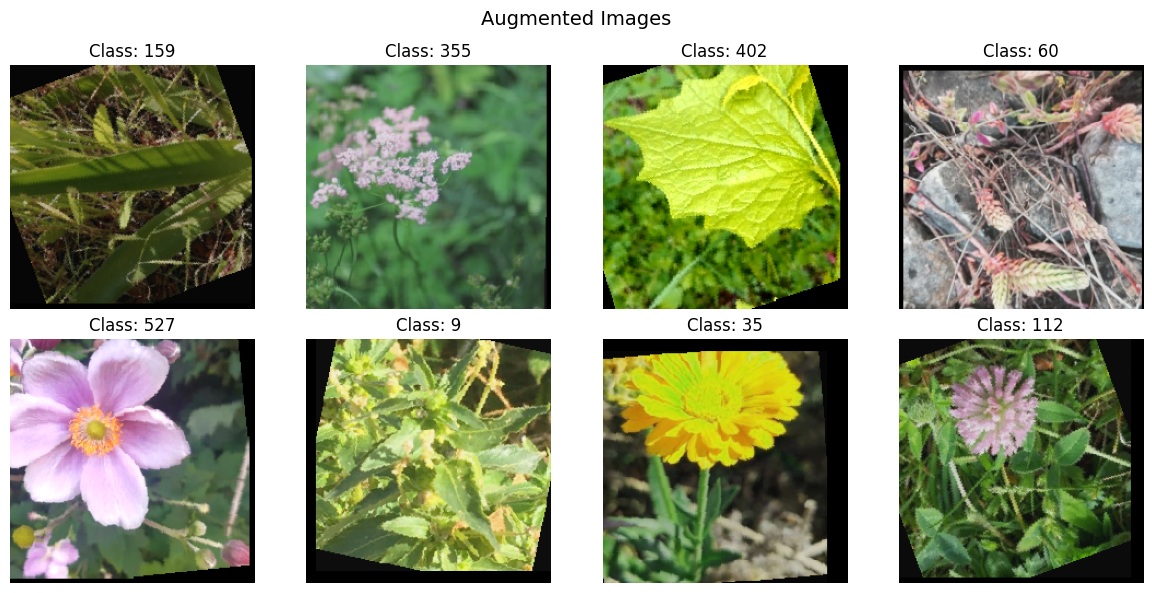

In [20]:
images, labels = next(iter(loader.get_train_loader()))
print(f"Batch: {images.shape}")

def show_batch(images, labels):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle("Augmented Images", fontsize=14)
    
    for idx, ax in enumerate(axes.flat):
        img = (images[idx] * std + mean).permute(1, 2, 0).numpy().clip(0, 1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Class: {labels[idx].item()}')
    
    plt.tight_layout()
    plt.show()

show_batch(images, labels)